In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.interpolate as interp
import warnings
warnings.filterwarnings('ignore')


from ripser import ripser, plot_dgms
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

import scipy.interpolate as inter

In [2]:
class CurveProjection():
    """ 
       initialization window parametrs
    """
    def __init__(self,x,dim,Tau,dT):
        self.x=x
        self.dim=dim
        self.Tau=Tau
        self.dT=dT
        
    """ 
       Method for sliding window creation
    """
    
    def getSlidingWindow(self):
        N = len(x)
        NWindows = int(np.floor((N-dim*Tau)/dT)) 
        X = np.zeros((NWindows, dim)) 
        idx = np.arange(N)
        for i in range(NWindows):
            
            idxx = dT*i + Tau*np.arange(dim) 
            start = int(np.floor(idxx[0]))
            end = int(np.ceil(idxx[-1]))+2
            if end >= len(x):
                X = X[0:i, :]
                break
            
            X[i, :] = interp.spline(idx[start:end+1], x[start:end+1], idxx)
        return X
    
    
    def pca(self,X,n):
        main_comp=PCA(n_components=n)
        result=main_comp.fit_transform(X)
        return result

In [3]:
data=pd.read_csv('123.csv')
mlii=data.iloc[:,1]


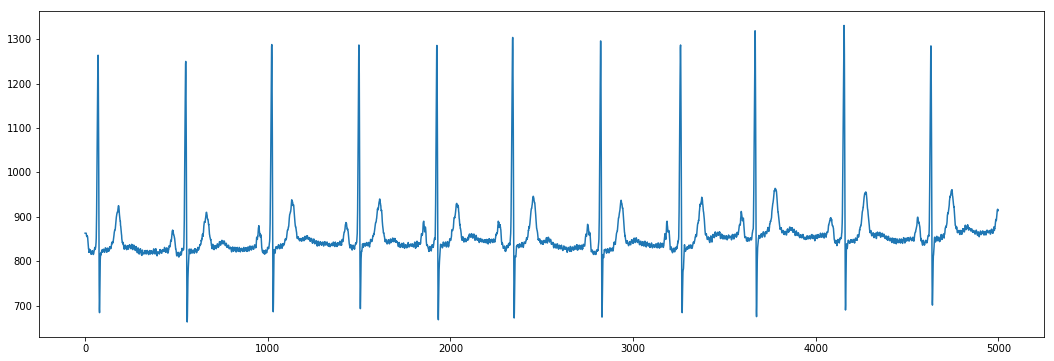

In [4]:
plt.figure(figsize=(18,6))
plt.plot(mlii[0:5000])
sig=mlii[0:5000]

## Fourier

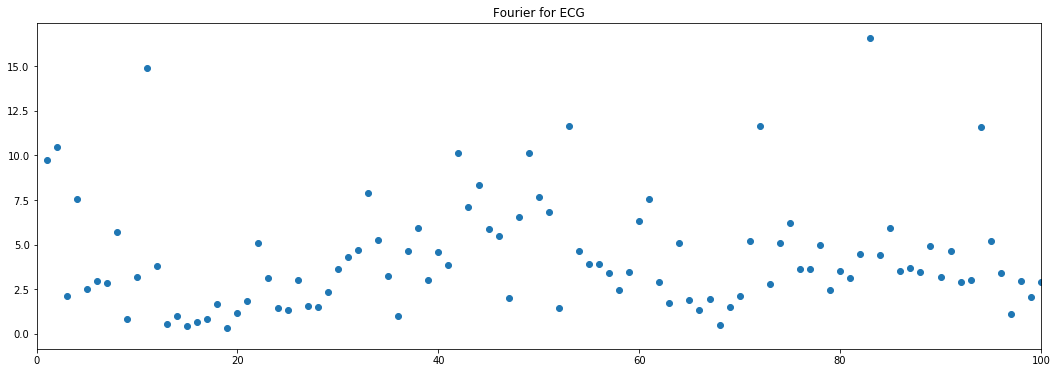

In [5]:
cos_fft = np.fft.fft(sig)

plt.figure(figsize=(18,6))
plt.scatter(range(len(cos_fft))[1:],(np.abs(cos_fft)/len(cos_fft)*2)[1:])
plt.xlim(0,100)
plt.title('Fourier for ECG');

In [6]:
print("From the graph above: frequency = 2, amplitude = {}".format("%.2f" % (np.abs(cos_fft)/len(cos_fft)*2)[2]))

From the graph above: frequency = 2, amplitude = 10.45


Text(0.5,1,'frequency')

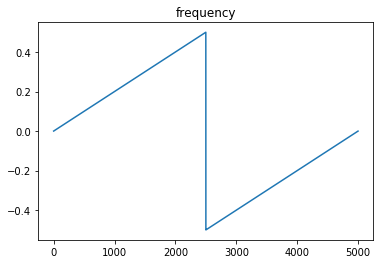

In [7]:
freqs = np.fft.fftfreq(len(sig))
plt.plot(freqs)
plt.title("frequency")

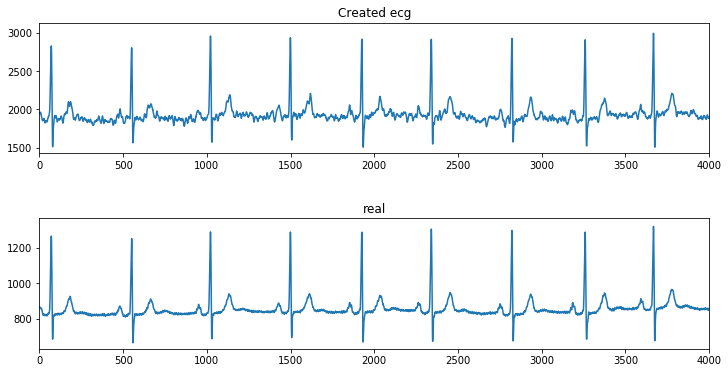

In [8]:
e=len(sig)
x=np.random.random(5000)
s = np.fft.ifft(cos_fft*np.pi*np.cos(x)**2)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ax1.plot(s)
ax1.set_xlim(0,4000)
ax1.set_title('Created ecg')

ax2.plot(sig)
ax2.set_xlim(0,4000)
ax2.set_title('real')

plt.subplots_adjust(hspace=0.5);

In [9]:
#frequency 2

In [10]:
noiseAmp = float(input("Noise Amplitude: "))
programed_to = 5000
original_signal=sig
noise=noiseAmp*np.cos(2*np.pi)

Noise Amplitude: 1


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    #
    plt.legend(loc='best')
#     plt.figure(figsize=(18,6))
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

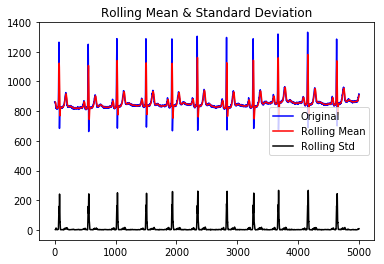

Results of Dickey-Fuller Test:
Test Statistic                -1.095023e+01
p-value                        8.835952e-20
#Lags Used                     2.900000e+01
Number of Observations Used    4.970000e+03
Critical Value (1%)           -3.431666e+00
Critical Value (5%)           -2.862122e+00
Critical Value (10%)          -2.567080e+00
dtype: float64


In [12]:
test_stationarity(sig)


In [13]:
amp = 10.45
freq = 2
t = np.linspace(0, 1, 3000)
art_sin = amp * np.exp(np.cos(freq*t)**2) + 0.5;

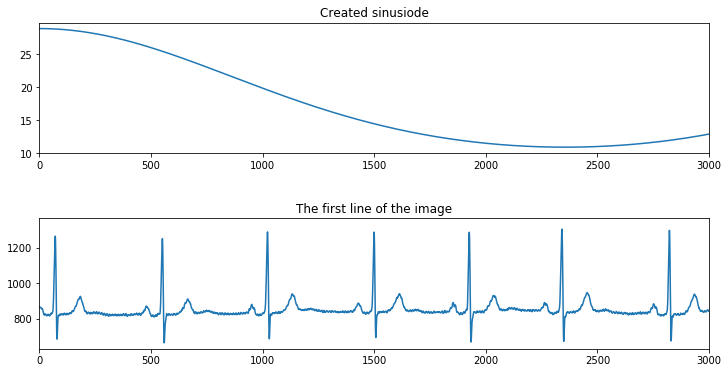

In [14]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ax1.plot(art_sin)
ax1.set_xlim(0,3000)
ax1.set_title('Created sinusiode')

ax2.plot(sig)
ax2.set_xlim(0,3000)
ax2.set_title('The first line of the image')

plt.subplots_adjust(hspace=0.5);

## Wavelet

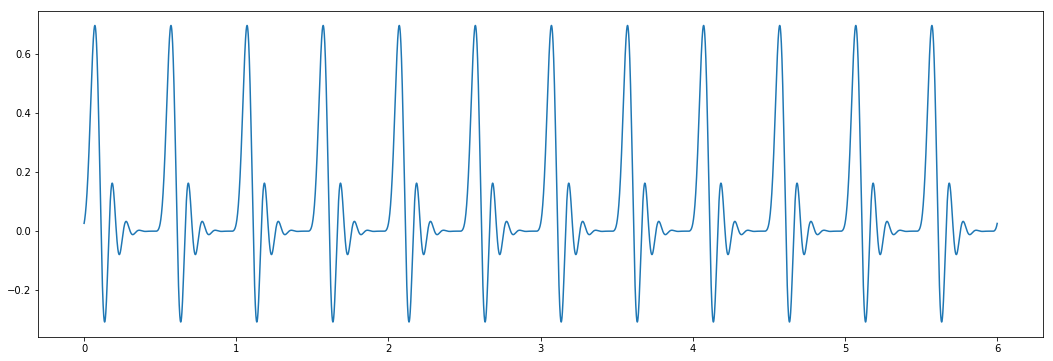

In [15]:
import scipy
import scipy.signal as signal
rr = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5, 0.5, 0.5] # rr time in seconds
fs = 8000.0 # sampling rate
pqrst = signal.wavelets.daub(10) 
ecg = scipy.concatenate([signal.resample(pqrst, int(r*fs)) for r in rr])
t = scipy.arange(len(ecg))/fs
plt.figure(figsize=(18,6))
plt.plot(t, ecg)
plt.show()

In [16]:
import numpy as np

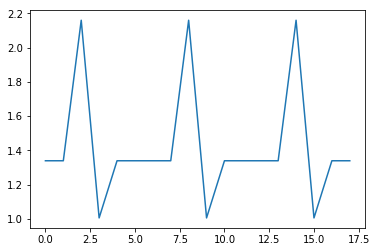

In [17]:
rr = [1.0, 1.0, 0.5, 1.5, 1.0, 1.0,1.0, 1.0, 0.5, 1.5, 1.0, 1.0,1.0, 1.0, 0.5, 1.5, 1.0, 1.0]
plt.plot(np.exp(np.cos(rr)**2))

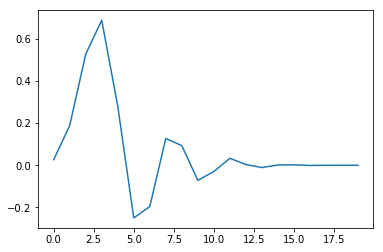

In [18]:
plt.plot(pqrst)

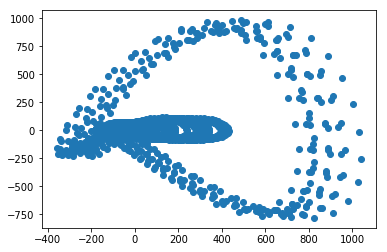

In [19]:
dim=20
Tau=1
dT=1
x=sig
test=CurveProjection(x,dim,Tau,dT)
func=test.getSlidingWindow()
result_original=test.pca(func,3)
plt.scatter(result_original[:,0],result_original[:,1])

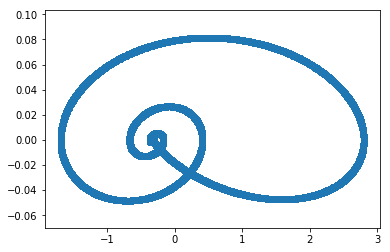

In [20]:
x=ecg
test=CurveProjection(x,dim,Tau,dT)
func=test.getSlidingWindow()
result_simulation=test.pca(func,3)

plt.scatter(result_simulation[:,0],result_simulation[:,1])

No handles with labels found to put in legend.


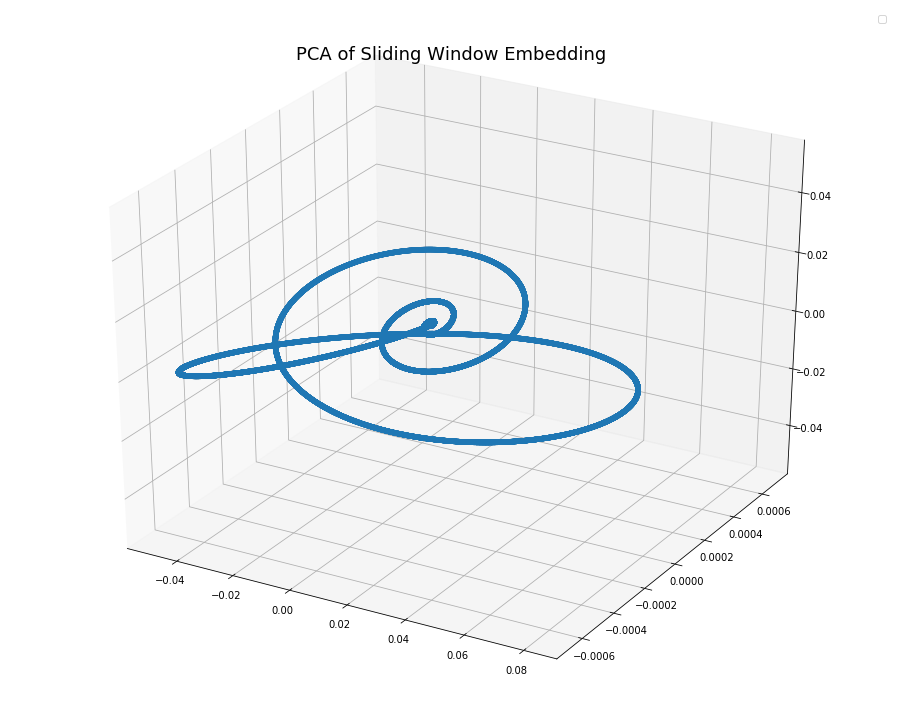

In [21]:
plt.figure(figsize=(25,10))
ax = plt.subplot(121,projection = '3d')

ax.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax.scatter(result_simulation[:, 1],result_simulation[:, 2])


plt.legend()
plt.tight_layout()

In [22]:
rrs=np.array(rr)

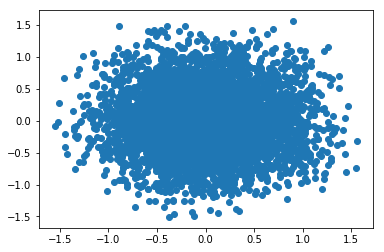

In [26]:
x=function
test=CurveProjection(x,dim,Tau,dT)
func=test.getSlidingWindow()
result_simulation=test.pca(func,3)

plt.scatter(result_simulation[:,1],result_simulation[:,2])

In [24]:
p=[1.0,1.5,0.5]
rrs=np.random.choice(p,4800)

In [25]:
rrs
function=np.exp(np.cos(rrs)**2)